# <a id="#">Task 3 – Mean, median, and Gaussian filtering</a>

In [1]:
import numpy
import matplotlib.pyplot as plt

---

## Linear filtering by convolution (mean filter)

**<a id="#">Task 3.1.1.</a>** Load the image `data/lena.png` and show it:

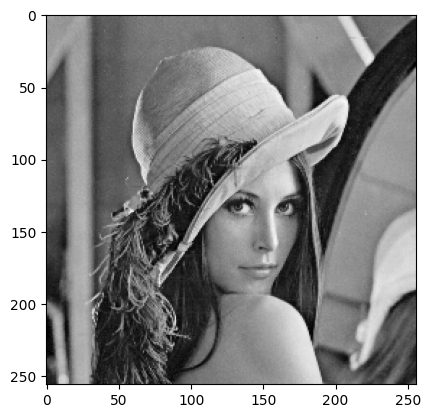

In [2]:
lena = plt.imread('data/lena.png')
plt.figure()
plt.imshow(lena, 'gray')

**<a id="#">Task 3.1.2.</a>** Implement a mean filter:

In [3]:
def meanfilter(img, size):
    result = numpy.zeros(img.shape)
    n = (size - 1) // 2
    for p in numpy.ndindex(img.shape):
        neighborhood_sum = 0
        # leave the loop if the pixel is at the border (neighborhood outside image)
        if p[0] < n or p[1] < n or p[0] > img.shape[0] - 1 - n or p[1] > img.shape[0] - 1 - n:
            continue
        
        for q in numpy.ndindex(size, size):
            # compute lateral and vertical distance of neighborhood pixel from p
            v = q[0] - n
            l = q[1] - n

            # add the intensity value of the pixel to neighborhood_sum
            neighborhood_sum += img[p[0] + v, p[1] + l]
        
        # compute the mean of neighborhood_sum
        mean = neighborhood_sum / size ** 2

        result[p] = mean

    return result

**<a id="#">Task 3.1.3.</a>** Test your implementation from above by using the function `meanfilter` for the previously loaded image and show the result:

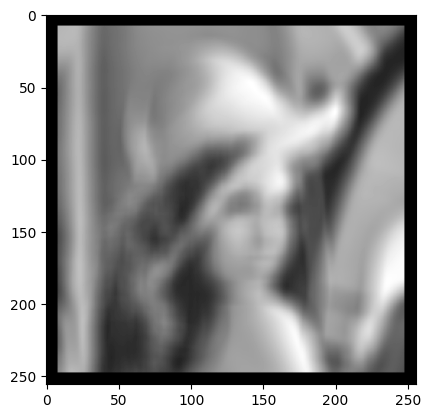

In [19]:
img_filtered = meanfilter(lena, 17)
plt.figure()
plt.imshow(img_filtered, 'gray')

**<a id="#">Task 3.1.4.</a>** Compare your result for filter size `5` with the correct result image `data/lena_meanfilter5.png`:

In [5]:
lena_filter5 = plt.imread('data/lena_meanfilter5.png')
assert numpy.allclose(lena_filter5, meanfilter(lena, 5), atol = 1/255)

---

## Non-linear filtering

**<a id="#">Task 3.2.1.</a>** Implement a median filter:

In [6]:
def medianfilter(img, size):
    result = numpy.zeros(img.shape)
    n = (size - 1) // 2
    for p in numpy.ndindex(img.shape):
        neighborhood_list = []
        # leave the loop if the pixel is at the border (neighborhood outside image)
        if p[0] < n or p[1] < n or p[0] > img.shape[0] - 1 - n or p[1] > img.shape[0] - 1 - n:
            continue
        
        for q in numpy.ndindex(size, size):
            # compute lateral and vertical distance of neighborhood pixel from p
            v = q[0] - n
            l = q[1] - n

            # add the intensity value of the pixel to neighborhood_sum
            neighborhood_list.append(img[p[0] + v, p[1] + l])
        
        # compute the median of neighborhood_list
        neighborhood_list.sort()
        median = neighborhood_list[int((len(neighborhood_list) - 1) / 2)]

        result[p] = median
    return result

**<a id="#">Task 3.2.2.</a>** First, test your implementation from above by using the function `medianfilter` for the previously loaded image and show the result:

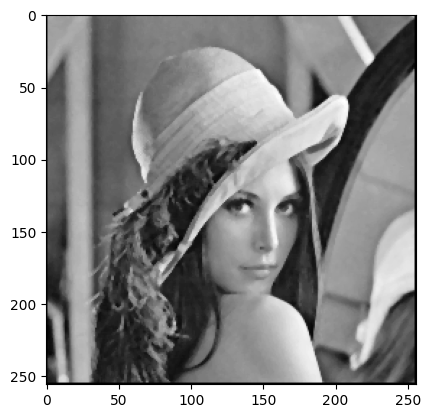

In [47]:
plt.figure()
plt.imshow(medianfilter(lena, 3), 'gray')

Then, compare your result for filter size `5` with the correct result image `data/lena_medianfilter5.png`:

In [8]:
lena_filter5 = plt.imread('data/lena_medianfilter5.png')
assert numpy.allclose(lena_filter5, medianfilter(lena, 5), atol = 1/255)

---

## Using pre-implemented filters

**<a id="#">Task 3.3.1.</a>** Load the package `scipy.ndimage`:

In [9]:
import scipy.ndimage

**<a id="#">Task 3.3.2 (a).</a>** Apply a **mean filter** from `scipy.ndimage` to the loaded image:

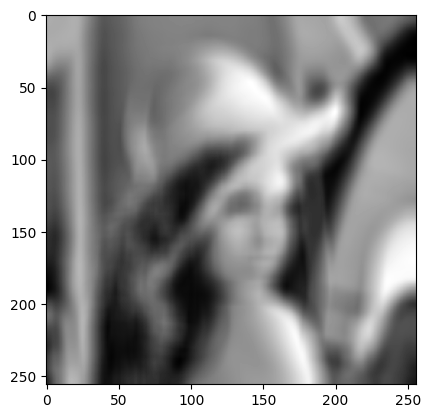

In [18]:
plt.figure()
plt.imshow(scipy.ndimage.uniform_filter(lena, 17), 'gray')

**<a id="#">Task 3.3.2 (b).</a>** Apply a **median filter** from `scipy.ndimage` to the loaded image:

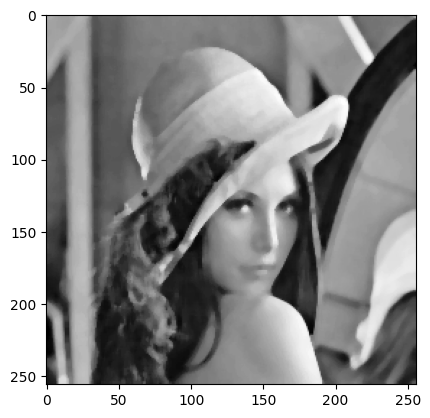

In [14]:
plt.figure()
plt.imshow(scipy.ndimage.median_filter(lena, 5), 'gray')

**<a id="#">Task 3.3.2 (c).</a>** Apply a **Gaussian filter** from `scipy.ndimage` to the loaded image:

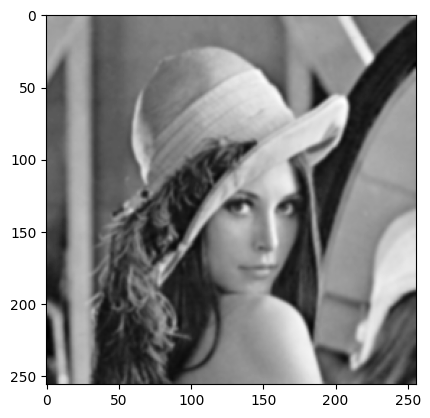

In [15]:
plt.figure()
plt.imshow(scipy.ndimage.gaussian_filter(lena, 1), 'gray')

**<a id="#">Task 3.3.3.</a>** Compare the results obtained using the functions from `scipy.ndimage` with those you obtained using your own implementations. What are the main differences? Do you have an explanation?

Own implemaentation is much slower + scipy.ndimage's implementation does not lead to the black border around the image

---

## Slicing and benchmarking

**<a id="#">Task 3.4.2.</a>** Implement either a mean filter or a median filter using only a single `for`-loop:

In [42]:
def fastfilter(img, size):
    result = numpy.zeros(img.shape)
    n = (size - 1) // 2
    for p in numpy.ndindex(img.shape):
        # leave the loop if the pixel is at the border (neighborhood outside image)
        if p[0] < n or p[1] < n or p[0] > img.shape[0] - 1 - n or p[1] > img.shape[0] - 1 - n:
            continue
        
        # store intensity values of pixels in the neighborhood in a sorted list
        neighborhood = img[p[0]-n:p[0]+n+1, p[1]-n:p[1]+n+1]
        values = sorted(neighborhood.flatten())

        # middle elment of the list is the median
        median = values[int((len(values) - 1) / 2)]

        result[p] = median

    return result

**<a id="#">Task 3.4.3.</a>** First, test your implementation from above by using the function `fastfilter` for the previously loaded image and show the result:

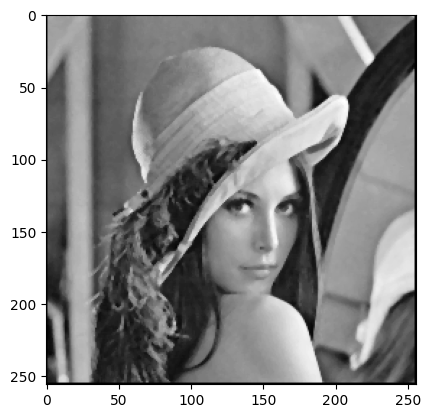

In [48]:
plt.imshow(fastfilter(lena, 3), 'gray')

Then, compare your result to those obtained using your implementation for either `meanfilter` or `medianfilter`, respectively:

In [49]:
assert numpy.allclose(fastfilter(lena, 5), medianfilter(lena, 5), atol = 1/255)

**<a id="#">Task 3.4.4.</a>** Benchmark the code run times:

In [50]:
%timeit medianfilter(lena, 9)

%timeit fastfilter(lena, 9)

3.27 s ± 86.3 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
1.01 s ± 95.2 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


**<a id="#">Task 3.4.5.</a>** Document your observations regarding the benchmarking results and try to think of an explanation: